In [1]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit_aer import AerSimulator

In [2]:
def Uf00(circuit):
 pass

def Uf01(circuit):
    circuit.cx(0,1)

def Uf10(circuit):
    circuit.x(1)
    circuit.cx(0,1)

def Uf11(circuit):
    circuit.x(1)

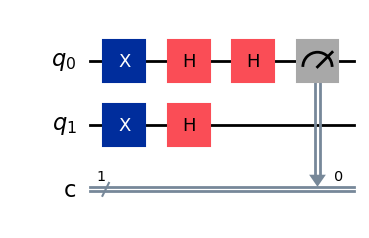

In [3]:
# 量子回路の初期化
circuit = QuantumCircuit(2,1)

# パウリX行列を全体に適用
circuit.x([0,1])

# アダマール行列を全体に適用
circuit.h([0,1])

# オラクルを実行
Uf00(circuit)

# アダマール行列を左の量子ビットに適用
circuit.h(0)

# 測定
circuit.measure(0,0)

circuit.draw("mpl")

In [4]:
# 実行と結果取得
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1000)
result = job.result()

counts = result[0].data.c.get_counts()
print(counts)

{'1': 1000}
